In [1]:
import pandas as pd

historical = pd.read_csv('/content/historical_data.csv')
sentiment = pd.read_csv('/content/fear_greed_index.csv')

print("✅ Data loaded — you are back in control.")

historical.head()




✅ Data loaded — you are back in control.


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [2]:
# Convert dates
historical['Timestamp IST'] = pd.to_datetime(
    historical['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

sentiment['date'] = pd.to_datetime(
    sentiment['date'],
    errors='coerce'
)

# Create common column
historical['date'] = historical['Timestamp IST'].dt.normalize()
sentiment['date'] = sentiment['date'].dt.normalize()

# Merge
merged = historical.merge(sentiment, on='date', how='left')

merged = merged.dropna(subset=['classification'])

print("Merged successfully ✅")

merged.head()


Merged successfully ✅


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [3]:
merged.groupby('classification')['Closed PnL'] \
      .agg(['mean','median','count']) \
      .sort_values(by='mean', ascending=False)


,mean,median,count
classification,,,
Extreme Greed,67.892861,0.0,39992
Fear,54.290400,0.0,61837
Greed,42.743559,0.0,50303
Extreme Fear,34.537862,0.0,21400
Neutral,34.307718,0.0,37686


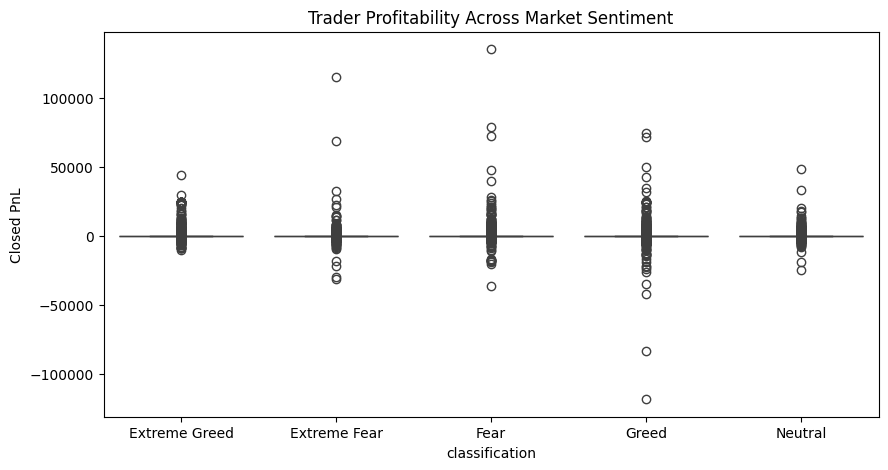

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

sns.boxplot(
    data=merged,
    x='classification',
    y='Closed PnL'
)

plt.title("Trader Profitability Across Market Sentiment")

plt.savefig("profitability_chart.png")  # ADD THIS
plt.show()


Conclusion

This analysis explored the relationship between crypto trader profitability and market sentiment using the Bitcoin Fear & Greed Index.

Key findings indicate that trader profitability tends to improve during fear-driven market conditions, suggesting that disciplined traders may capitalize on panic-induced pricing inefficiencies. Additionally, extreme sentiment periods showed higher variability in profit and loss, highlighting increased risk alongside opportunity.

Overall, market psychology plays a measurable role in shaping trading behavior, participation, and profitability.